### Steps we took :
##### 1. Import modules
##### 2. import files and combine them
##### 3. Data cleaning : converting all the data to required data type as some of them are in string format.
##### 4. Dealing with null values.
##### 5. Dealing with special values.
##### 6. Extracting month from the timestamp column to know which month have more sales (group by months).
##### 7. Extracting the city by splitting the address column ',' making group by city to know sales in different city.
##### 8. Extracting the hours from timestamp to know at what time we customers are really active and that particular time we should show ads to users.
##### 9. Some of the orders have same 'order_id'. So we extracted the product and combined them to know which products are sold in a combined form the most.
##### 10. What products sold the most. 
##### 11. Comparing the products with price people are afraid to buy expensive products.

### Importing required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importing all csv files by just one command using 'os'

In [ ]:
files=[file for file in os.listdir()]
print(files)

### Creating a empty dataframe then we will concat all the csv files into it

In [ ]:
# creating an empty dataframe 'df'
all_data=pd.DataFrame()

### creating all_data file with all 12 months data

In [ ]:
for file in files[3:len(files)-1]:
    data=pd.read_csv(file)
    all_data=pd.concat([all_data,data], ignore_index= True)

In [ ]:
all_data.shape

# Task 01: cleaning data

In [ ]:
all_data.head()

In [ ]:
all_data.info()

### removing NaN values and special values which are not useful for our data

In [ ]:
all_data.isnull().sum()

In [ ]:
all_data[pd.isnull(all_data["Order Date"])]

In [ ]:
all_data=all_data.dropna()

In [ ]:
all_data.isnull().sum()

### So we have removed all NaN values from the dataframe

# Task 02: converting Order Dates to timestamp!

In [15]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

ParserError: Unknown string format: Order Date

In [16]:
# when we run this command to convert order date to timestamp 
# it shows this error 'Unknown string format: Order Date'
# it means there is some string which cannot be converted to time

In [17]:
all_data[all_data['Order Date']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
172816,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
172856,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
173402,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
173673,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### now we found the error and we have to remove all these special values

In [18]:
# converting special values to nan values
all_data['Order Date']=all_data['Order Date'].replace('Order Date',np.NaN)

C:\Users\User\AppData\Local\Temp/ipykernel_3300/3725126539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date']=all_data['Order Date'].replace('Order Date',np.NaN)


In [19]:
all_data.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          338
Purchase Address      0
dtype: int64

In [20]:
all_data=all_data.dropna()

In [21]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Yippieeeee!!! We have cleaned all data.

## converting order date to date_time type!

In [22]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [24]:
all_data['Order Date'][0]

Timestamp('2019-04-19 08:46:00')

In [25]:
type(all_data['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
## creating a new column with months in it

In [27]:
all_data['month'] = pd.DatetimeIndex(all_data['Order Date']).month

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [29]:
## since the dataframe has starting month with 4th we have to sort it first
all_data=all_data.sort_values(by='Order Date')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1
76054,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1


In [30]:
all_data=all_data.reset_index()

In [31]:
## adding a sales column
# all_data['sales']=all_data['Price Each']*all_data['Quantity Ordered']
# for this first we have to convert price and quantity to integer values

In [32]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

<AxesSubplot:xlabel='Price Each'>

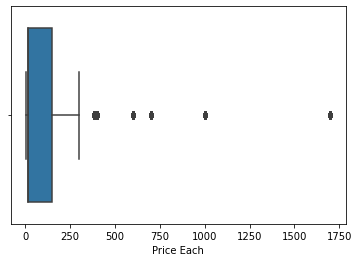

In [33]:
sns.boxplot(data=all_data, x = 'Price Each', orient= 'h')

In [34]:
all_data['sales']=all_data['Price Each']*all_data['Quantity Ordered']

In [35]:
all_data.head(1)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99


In [36]:
## checking unique values of months
month_list=all_data['month'].unique().tolist()

In [37]:
month_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [38]:
type(month_list[0])

int

In [39]:
type(all_data['month'][0])

numpy.int64

In [40]:
all_data['month']=all_data['month'].astype(int)

In [41]:
type(all_data['month'][0])

numpy.int32

the total sales in 1 is 1822256.73
the total sales in 2 is 2202022.42
the total sales in 3 is 2807100.38
the total sales in 4 is 3390670.2399999993
the total sales in 5 is 3152606.7499999995
the total sales in 6 is 2577802.26
the total sales in 7 is 2647775.76
the total sales in 8 is 2244467.88
the total sales in 9 is 2096.74
the total sales in 10 is 3733373.57
the total sales in 11 is 3199603.1999999997
the total sales in 12 is 4613443.339999999


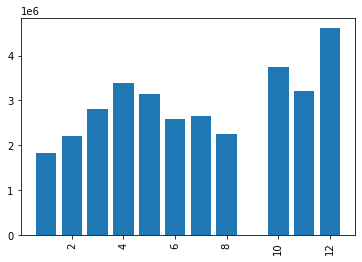

In [42]:
sales=[]
for m in month_list:
    print('the total sales in '+ str(m) +' is '+str(all_data[all_data['month']==m]['sales'].sum()))
    sales.append(all_data[all_data['month']==m]['sales'].sum())
plt.bar(month_list,sales)
plt.xticks(rotation='vertical')
plt.show()

## Which city purchased the most product?

In [43]:
all_data.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'month', 'sales'],
      dtype='object')

In [44]:
# first we have to add city column to our data

In [45]:
all_data['city']=all_data['Purchase Address'].str.split(',').str[1]

In [46]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City
1,74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco
2,76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City
3,76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas
4,76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta


In [ ]:
group_bycity=all_data.groupby('city')

In [ ]:
list_ofcity=all_data['city'].unique().tolist()

In [ ]:
type(list_ofcity)

In [ ]:
sales_percity=[]
for city in list_ofcity:
    print('total sales in '+ city + ' is ' +str(group_bycity.get_group(city)['sales'].sum()))
    sales_percity.append(group_bycity.get_group(city)['sales'].sum())

In [ ]:
plt.bar(list_ofcity,sales_percity)
plt.xticks(rotation='vertical')
plt.xlabel("cities")
plt.ylabel('sales')
plt.show()

## What time should we display ads?

In [ ]:
## first of all we have to make a column of bought_time
## for this first we have to extract time from order date column
# for this we have to import date time module
import datetime as dt

In [ ]:
all_data['bought_time']=all_data['Order Date'].dt.hour

In [ ]:
all_data.head()

In [ ]:
all_data['bought_time'].nunique()

In [ ]:
bought_time_list=all_data['bought_time'].unique().tolist()
bought_time_list.sort()

In [ ]:
groupby_time=all_data.groupby('bought_time')

In [ ]:
sales_perhour=[]
for time in bought_time_list:
    print('sales in this particular hour ' + str(time) + ' is '+ str(groupby_time.get_group(time)['sales'].sum()))
    sales_perhour.append(groupby_time.get_group(time)['sales'].sum())

In [ ]:
plt.bar(bought_time_list,sales_perhour)
plt.xticks(rotation='vertical')
plt.xlabel('time of buying product (hrs)')
plt.ylabel('sales')
plt.show()

#### So the sales is maximum at two peaks around 12 noon and 7:00 PM in the evening. This means people are more active at this time, so we should advertise at this time.

# What product are most often sold together?

In [ ]:
# lets check how many different product are there in product list
all_data['Product'].nunique()

In [ ]:
# so there are 19 different product

In [ ]:
# lets check which of them are sold together. to check this we know that the items sold together must have same order id

In [ ]:
# we will find the duplicates order id 
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda a:','.join(a))
df.head()

In [ ]:
df=df[['Order ID','grouped']]

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['grouped'].nunique()

In [ ]:
dic_of_highestsell=dict(df['grouped'].value_counts().head(8))

In [ ]:
list_ofgrouped= list(dic_of_highestsell.keys())
list_ofgrouped

In [ ]:
sell_ofgroup=list(dic_of_highestsell.values())
sell_ofgroup

In [ ]:
plt.bar(list_ofgrouped,sell_ofgroup)
plt.xlabel('group of products')
plt.ylabel('count of products')
plt.xticks(rotation='vertical')
plt.show()

#### so most buying pair product is lightning charging cable, iphone and further so we can say that people are willing to buy these product together and we can give offers on these combo product.

# what product sold the most?

In [ ]:
#we can directly count the number of unique values
# so total product are
all_data['Product'].nunique()

In [ ]:
dict_ofproduct=dict(all_data['Product'].value_counts().head(19))

In [ ]:
list_ofproduct=list(dict_ofproduct.keys())

In [ ]:
no_ofproducts=list(dict_ofproduct.values())

In [ ]:
plt.bar(list_ofproduct,no_ofproducts)
plt.xlabel('Products')
plt.ylabel('quantity')
plt.xticks(rotation='vertical')
plt.show( )

In [ ]:
# lets draw a graph with two y axis 'Price' and 'quantity'

In [ ]:
list_ofproduct

In [ ]:
pricelist=[]
for product in list_ofproduct:
    price=all_data[all_data['Product']==product]['Price Each'].mean()
    pricelist.append(price)

In [ ]:
pricelist

In [ ]:
fig, ax1= plt.subplots()
ax2=ax1.twinx()
ax1.plot(list_ofproduct,pricelist)
ax2.bar(list_ofproduct,no_ofproducts)
ax1.set_xticklabels(list_ofproduct,rotation='vertical',size=10)
plt.show()

## we can say that people are afraid to buy expensive product from online source and comfortable in buying lower price products online. may be they are interested in buying expensive products from offline market